# What is the correlation between the number of Google Reviews and number of Yelp Reviews for Denver Ramen Restaurants

To answer this question I am going to perform an observational study since I just have to find the data without changing any variables. More specifically this will be a retrospective study because the data is already created. 

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [40]:
df = pd.read_csv('ramen.csv')
print(df.columns)
print(df.dtypes)

Index(['Name', 'Neighborhood', 'Yelp Rating', 'Yelp Reviews', 'Google Rating',
       'Google Reviews'],
      dtype='object')
Name               object
Neighborhood       object
Yelp Rating       float64
Yelp Reviews        int64
Google Rating      object
Google Reviews     object
dtype: object


In [41]:
df['Google Reviews'] = pd.to_numeric(df['Google Reviews'].replace(',', '', regex=True), errors='coerce')
df = df.dropna(subset=['Google Reviews'])
correlation = df['Yelp Reviews'].corr(df['Google Reviews'])
print(f'Correlation coefficient (r): {correlation:.3f}')

Correlation coefficient (r): 0.485


In [42]:
r_squared = correlation ** 2
print(f'Coefficient of determination (r²): {r_squared:.3f}')

Coefficient of determination (r²): 0.235


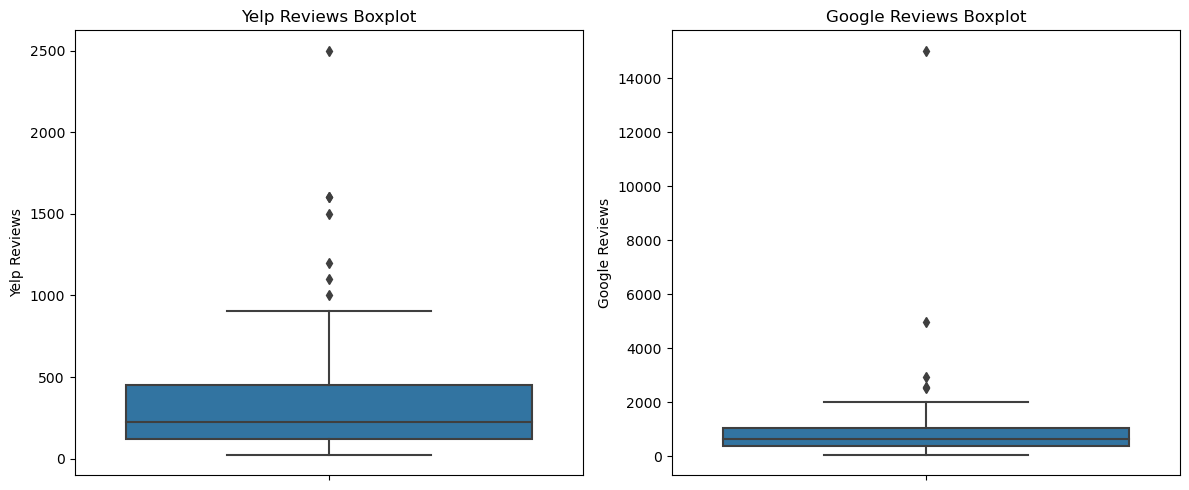

In [43]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Yelp Reviews'])
plt.title('Yelp Reviews Boxplot')
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Google Reviews'])
plt.title('Google Reviews Boxplot')
plt.tight_layout()
plt.show()

In [44]:
def get_iqr_bounds(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return lower, upper

yelp_lower, yelp_upper = get_iqr_bounds(df['Yelp Reviews'])
google_lower, google_upper = get_iqr_bounds(df['Google Reviews'])

df_filtered = df[
    (df['Yelp Reviews'] >= yelp_lower) & (df['Yelp Reviews'] <= yelp_upper) &
    (df['Google Reviews'] >= google_lower) & (df['Google Reviews'] <= google_upper)
]

correlation = df_filtered['Yelp Reviews'].corr(df_filtered['Google Reviews'])
print(f'Correlation coefficient without outliers (r): {correlation:.3f}')

print(f'Coefficient of determination without outliers (r²): {r_squared:.3f}')


Correlation coefficient without outliers (r): 0.779
Coefficient of determination without outliers (r²): 0.235


I removed the outliers in order to have a more accurate analysis of the relationship between Yelp and Google Reviews. I found outliers by calculating the first and third quartiles for both Google and Yelp reviews. An Outlier is any value that falls below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR. After I removed the outliers I recalculated the r and r² values. 

There is a moderate positive correlation between the number of reviews and the number of yelp reviews for ramen restaurants in Denver. 
Without outliers, the correlation coefficient (without outliers) was 0.779. The range of the correlation coefficient is -1 to +1. Since the correlation coefficient is positive and moderately close to one, it shows that restaurants with more Yelp Reviews tend to also have more Google Reviews. The Coefficient of determination was 0.235, which means that about 23.5% of the variation in Google Reviews can be explained by the variation in Yelp Reviews. So even though there is a correlation, it is not as stron